# Random Walk

In [14]:
class Location(object):
    def __init__(self, x, y) -> None:
        """Assumes X and Y are numbers"""
        self.x, self.y = x, y
        
    def move(self, deltaX, deltaY):
        """Assumes deltaX and deltaY are numbers"""
        return Location(self.x + deltaX, self.y + deltaY)
    
    def getX(self):
        return self.x
    
    def getY(self):
        return self.y
    
    def distFrom(self, other):
        ox, oy = other.x, other.y
        xDist, yDist = self.x - ox, self.y - oy
        return (xDist**2 + yDist**2)**0.5 # Calculate the hypotenuse as the crow flies
    
    def __str__(self) -> str:
        return '<' + str(self.x) + ', ' + str(self.y) + '>'

In [15]:
class Field(object):
    def __init__(self) -> None:
        self.drunks = {}
        
    def addDrunk(self, drunk, loc):
        if drunk in self.drunks:
            raise ValueError('Duplicate drunk')
        else:
            self.drunks[drunk] = loc
    
    def moveDrunk(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        xDist, yDist = drunk.takeStep()
        currentLocation = self.drunks[drunk]
        #use move method of location to get new location
        self.drunks[drunk] = currentLocation.move(xDist, yDist)
    
    def getLoc(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        return self.drunks[drunk]

In [16]:
import random

class Drunk(object):
    def __init__(self, name = None) -> None:
        """Assumes name is a str"""
        self.name = name
    
    def __str__(self) -> str:
        if self != None:
            return self.name
        return 'Anonymous'

class UsualDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0,1),(0,-1),(1,0),(-1,0)]
        return random.choice(stepChoices)
    

In [23]:
def walk(f, d, numSteps):
    """Assumes: f a Field, d a drink in f, and numsteps an int >=0.
    Moves d numSteps times; returns the distnace between the 
    final location andn the location at the start of the walk."""
    start = f.getLoc(d)
    for s in range(numSteps):
        f.moveDrunk(d)
    return start.distFrom(f.getLoc(d))

def simWalks(numSteps, numTrials, dClass):
    """Assumes numSteps an int >= 0, numTrials an in > 0,
    dClass a subclass of Drunk
    Simulates numTrials walks of numSteps steps each.
    Returns a list of the final distances for each trial."""
    Homer = dClass()
    origin = Location(0,0)
    distances = []
    for t in range(numTrials):
        f = Field()
        f.addDrunk(Homer, origin)
        distances.append(round(walk(f, Homer, numSteps),1))
    return distances

def drunkTest(walkLengths, numTrials, dClass):
    """Assumes walkLengths a sequence of ints >= 0
    numTrials an int > 0, dClass a subclass of Drunk
    For each number of steps in walkLengths, runs simWalks with numTrials
    walks and prints results"""
    for numSteps in walkLengths:
        distances = simWalks(numSteps, numTrials, dClass)
        print(dClass.__name__, 'random walk of ', numSteps, ' steps')
        print('Mean = ', round(sum(distances)/len(distances), 4))
        print('Max = ' + str(max(distances)) + ', Min = ' + str(min(distances)))

In [26]:
# Test our fuctions - AKA Smoke Test
drunkTest((0,1), 100, UsualDrunk)

UsualDrunk random walk of  0  steps
Mean =  0.0
Max = 0.0, Min = 0.0
UsualDrunk random walk of  1  steps
Mean =  1.0
Max = 1.0, Min = 1.0


In [24]:
# Run a Simulation Test for various walking lengths
# This looks like approx steps^2 is the expected distance.
drunkTest((10, 100, 1000, 10000), 100, UsualDrunk)

UsualDrunk random walk of  10  steps
Mean =  2.911
Max = 6.0, Min = 0.0
UsualDrunk random walk of  100  steps
Mean =  8.312
Max = 20.9, Min = 1.4
UsualDrunk random walk of  1000  steps
Mean =  28.059
Max = 73.8, Min = 3.2
UsualDrunk random walk of  10000  steps
Mean =  84.988
Max = 226.3, Min = 5.1


## Biased Random Walks

In [28]:
class ColdDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0.0,1.0),(0.0,-2.0),(1.0,0.0),(-1.0,0.0)]
        return random.choice(stepChoices)
    
class EWDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(1.0,0.0),(-1.0,0.0)]
        return random.choice(stepChoices)
    
    
def simAll(drinkKinds, walkLengths, numTrials):
    for dClass in drinkKinds:
        drunkTest(walkLengths, numTrials, dClass)

In [29]:
simAll((UsualDrunk, ColdDrunk, EWDrunk), (100, 1000), 10)

UsualDrunk random walk of  100  steps
Mean =  8.77
Max = 19.0, Min = 2.0
UsualDrunk random walk of  1000  steps
Mean =  25.19
Max = 42.2, Min = 8.6
ColdDrunk random walk of  100  steps
Mean =  28.58
Max = 45.1, Min = 12.2
ColdDrunk random walk of  1000  steps
Mean =  248.46
Max = 290.1, Min = 217.1
EWDrunk random walk of  100  steps
Mean =  10.2
Max = 22.0, Min = 0.0
EWDrunk random walk of  1000  steps
Mean =  14.8
Max = 42.0, Min = 0.0


## Chart/Graph IT

In [30]:
class styleIterator(object):
    def __init__(self, styles) -> None:
        self.index = 0
        self.styles = styles
    
    def nextStyle(self):
        result = self.styles[self.index]
        if self.index == len(self.styles) - 1:
            self.index = 0
        else:
            self.index += 1
        return result

In [31]:
import pylab

def simDrunk(numTrials, dClass, walkLengths):
    meanDistances = []
    for numSteps in walkLengths:
        print('Starting simulation of ' + str(numSteps) + ' steps')
        trials = simWalks(numSteps, numTrials, dClass)
        mean = sum(trials)/len(trials)
        meanDistances.append(mean)
    return meanDistances

def simAll1(drinkKinds, walkLengths, numTrials):
    styleChoice = styleIterator(('m-','r:', 'k-.'))
    for dClass in drinkKinds:
        curStyle = styleChoice.nextStyle()
        print('Starting simulation of', dClass.__name__)
        means = simDrunk(numTrials, dClass, walkLengths)
        pylab.plot(walkLengths, means, curStyle, label = dClass.__name__)
    pylab.title('Mean Distance from Origin (' + str(numTrials) + ' trials')
    pylab.xlabel('Number of Steps')
    pylab.ylabel('Distance from Origin')
    pylab.legend(loc = 'best')
    pylab.semilogx()
    pylab.semilogy()

Starting simulation of UsualDrunk
Starting simulation of 10 steps
Starting simulation of 100 steps
Starting simulation of 1000 steps
Starting simulation of 10000 steps
Starting simulation of 100000 steps
Starting simulation of ColdDrunk
Starting simulation of 10 steps
Starting simulation of 100 steps
Starting simulation of 1000 steps
Starting simulation of 10000 steps
Starting simulation of 100000 steps
Starting simulation of EWDrunk
Starting simulation of 10 steps
Starting simulation of 100 steps
Starting simulation of 1000 steps
Starting simulation of 10000 steps
Starting simulation of 100000 steps


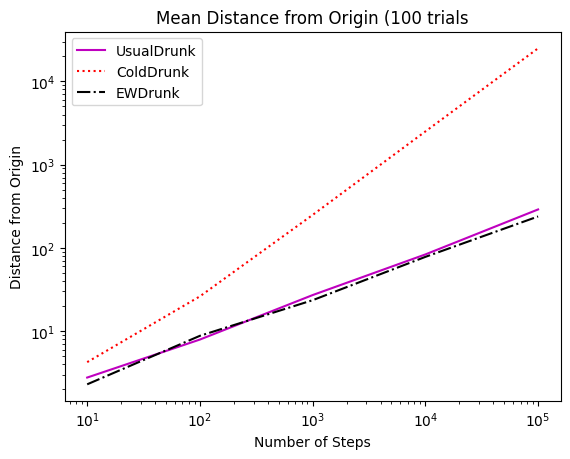

In [32]:
# Run similations
simAll1((UsualDrunk, ColdDrunk, EWDrunk), (10,100,1000,10000,100000), 100)

In [34]:
def getFinalLocs(numSteps, numTrials, dClass):
    locs = []
    d = dClass()
    for t in range(numTrials):
        f = Field()
        f.addDrunk(d, Location(0,0))
        for s in range(numSteps):
            f.moveDrunk(d)
        locs.append(f.getLoc(d))
    return locs

def plotLocs(drunkKinds, numSteps, numTrials):
    styleChoice = styleIterator(('k+', 'r^', 'mo'))
    for dClass in drunkKinds:
        locs = getFinalLocs(numSteps, numTrials, dClass)
        xVals, yVals = [], []
        for loc in locs:
            xVals.append(loc.getX())
            yVals.append(loc.getY())
        meanX = sum(xVals)/len(xVals)
        meanY = sum(yVals)/len(yVals)
        curStyle = styleChoice.nextStyle()
        pylab.plot(xVals, yVals, curStyle, 
                   label = dClass.__name__ + ' mean loc. = <'
                   + str(meanX) + ', ' + str(meanY) + '>')
        pylab.title('Location at End of Walks ('
                    + str(numSteps) + ' steps)')
        pylab.xlabel('Steps East/West of Origin')
        pylab.ylabel('Steps North/South of Origin')
        pylab.legend(loc = 'lower left')

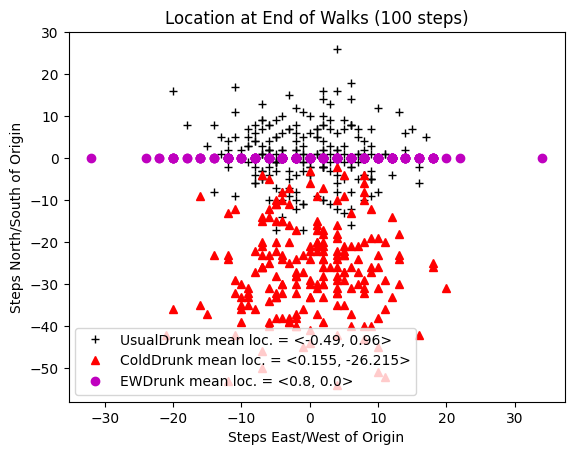

In [44]:
# Plotting Ending Walk Locations
# plotLocs(drunkKinds, numSteps, numTrials)
plotLocs((UsualDrunk, ColdDrunk, EWDrunk), 100, 200)

## Single Path Plotting

In [52]:
def traceWalk(drunkKinds, numSteps):
    styleChoice = styleIterator(('k+', 'r^', 'mo'))
    f = Field()
    for dClass in drunkKinds:
        d = dClass()
        f.addDrunk(d, Location(0,0))
        locs = []
        for s in range(numSteps):
            f.moveDrunk(d)
            locs.append(f.getLoc(d))
        xVals, yVals = [],[]
        for loc in locs:
            xVals.append(loc.getX())
            yVals.append(loc.getY())
        curStyle = styleChoice.nextStyle()
        pylab.plot(xVals, yVals, curStyle, 
                   label = dClass.__name__ )
    pylab.title('Sposts Visited on Walk ('
                + str(numSteps) + ' steps)')
    pylab.xlabel('Steps East/West of Origin')
    pylab.ylabel('Steps North/South of Origin')
    pylab.legend(loc = 'best')
    

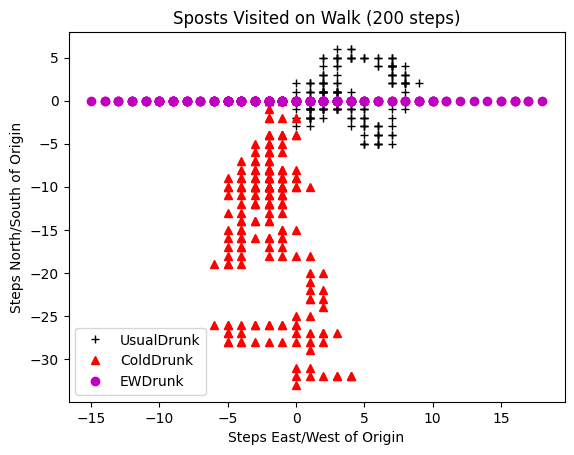

In [67]:
traceWalk((UsualDrunk, ColdDrunk, EWDrunk), 200)